# TASK 2  
**Project Name**: Unemployment Analysis with Python



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as px

# Loading Dataset

In [ ]:
data = pd.read_csv('Unemployment in India.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# Describing the Dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# Check null/missing values
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
# Rename Columns
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
                'Estimated Employed', 'Estimated Labour Participation Rate',
                'Region']

In [ ]:
# Analyzing top rows of dataset
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Checking Correlation between the feature of dataset

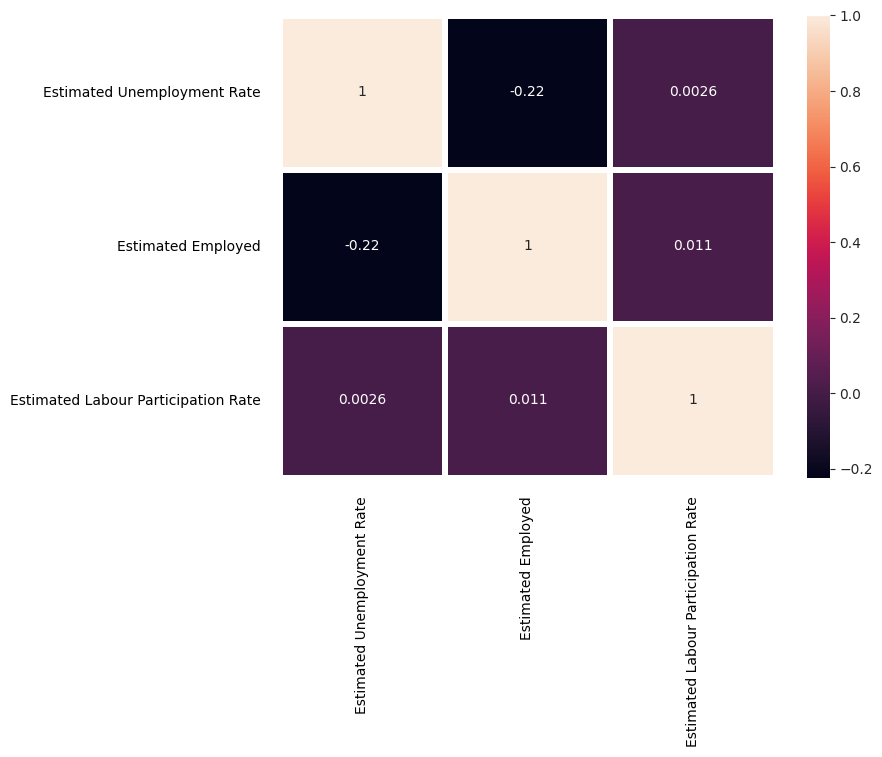

In [ ]:
# Plotting correlation heatmap
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

# Get the current axes
ax = plt.gca()

# Set tick parameters
ax.tick_params(size=10, color='w', labelsize=10, labelcolor='black')

# Compute the correlation matrix and plot the heatmap
ax = sns.heatmap(data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].corr(), annot=True, linewidth=3)

plt.show()

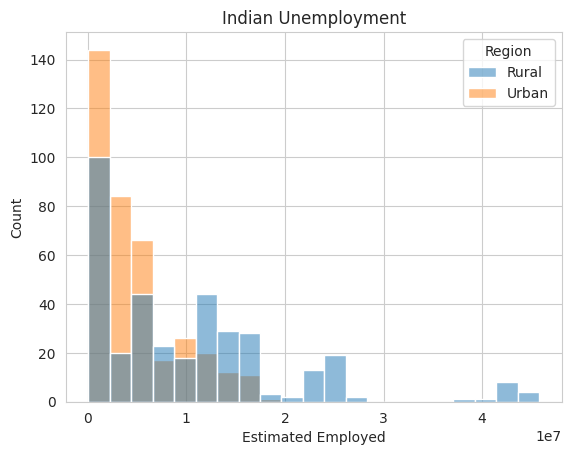

In [ ]:
# Plotting Histplot
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
                'Estimated Employed', 'Estimated Labour Participation Rate',
                'Region']
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Employed', hue='Region', data=data)
plt.show()

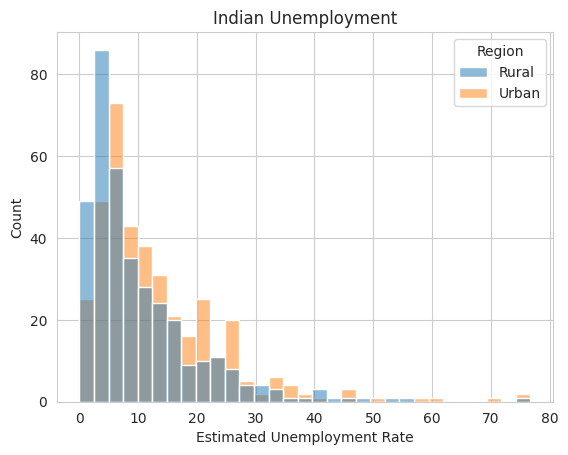

In [ ]:
# Plotting Histplot

plt.title("Indian Unemployment")
sns.histplot(x='Estimated Unemployment Rate', hue='Region', data=data)
plt.show()

# Dashboard to analyze the unemployment rate of each Indian state

In [ ]:
# Plotting Sunburst

unemployment = data[['States', 'Region', 'Estimated Unemployment Rate']]
unemployment = unemployment.dropna() # Drop rows with missing values
figure = px.sunburst(unemployment, path=['Region', 'States'],
                     values= 'Estimated Unemployment Rate',
                     width=700, height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()